# TCC2: Previsão de dimensão $L$ de antenas de microfita utilizando a frequência de ressonância ($f_{r}$)

## Passo 1: Importando as Bibliotecas Necessárias

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.constants import c
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import d2_absolute_error_score, r2_score, mean_squared_error, median_absolute_error, mean_absolute_error, max_error
from sklearn.metrics import mean_absolute_percentage_error, d2_tweedie_score, d2_pinball_score, mean_squared_log_error
from math import sqrt

## Passo 2: Leitura dos datasets

In [80]:
path = '../datasets/'

In [81]:
# Lista com os valores de epsilon para leitura de arquivos
lista_epsilon = ['_2_2', '_3_0', '_4_4', '_6_15', '_10_2']

# Um dicionário cuja chave é um nome que segue um padrão para facilitar o acesso, e o valor são os datasets em si
dicionario_df = {'df' + str(i): pd.read_csv(path + 'dataframe_final' + lista_epsilon[i] + '.csv') for i in range(0,5)}

In [82]:
dicionario_df

{'df0':              L       Freq           re         h          L2       max_re  \
 0     9.040404  10.385427   197.710808  0.433035    9.040404   197.710808   
 1    10.050505   9.728643   447.038475  0.481419   10.050505   447.038475   
 2    11.060606   9.231156   840.810463  0.529803   11.060606   840.810463   
 3    12.070707   8.778894  1049.172138  0.578187   12.070707  1049.172138   
 4    13.080808   8.371859  1081.787784  0.626571   13.080808  1081.787784   
 ..         ...        ...          ...       ...         ...          ...   
 91  100.959596   0.960804     0.986250  4.835965  100.959596     0.986250   
 92  101.969697   0.960804     1.194314  4.884348  101.969697     1.194314   
 93  102.979798   1.508040    20.665808  4.932732  102.979798    20.665808   
 94  103.989899   0.960804     9.183547  4.981116  103.989899     9.183547   
 95  105.000000   1.447236    46.839590  5.029500  105.000000    46.839590   
 
     Maior_que_anterior  Pico_re  Diferenca_fr_calculad

## Passo 3: Adequação dos datasets para treinamento

In [83]:
# Uma list comprehension que faz a cópia das colunas necessárias no dicionário 'dicionário_df' para todos os datasets
parameters_dataset = [dicionario_df['df' + str(i)][['L', 'Freq']].copy() for i in range(5)] 

In [84]:
# Uma lista contendo apenas as colunas desejadas para todos os datasets. Basta acessar pela posição da lista de 0 a 4
parameters_dataset[1]

,L,Freq
0,7.575758,11.236683
1,8.434343,10.142211
2,9.292929,8.914573
3,10.151515,8.145729
4,11.010101,7.467337
...,...,...
92,86.565657,0.960804
93,87.424242,0.960804
94,88.282828,0.960804
95,89.141414,0.960804


In [85]:
# Fazendo reshape dos Dados para treinar o modelo de SVR
X_0 = parameters_dataset[0]['Freq'].to_numpy().reshape(-1,1) 
y_0 = parameters_dataset[0]['L'].to_numpy().reshape(-1,1)

X_1 = parameters_dataset[1]['Freq'].to_numpy().reshape(-1,1) 
y_1 = parameters_dataset[1]['L'].to_numpy().reshape(-1,1)

X_2 = parameters_dataset[2]['Freq'].to_numpy().reshape(-1,1) 
y_2 = parameters_dataset[2]['L'].to_numpy().reshape(-1,1)

X_3 = parameters_dataset[3]['Freq'].to_numpy().reshape(-1,1) 
y_3 = parameters_dataset[3]['L'].to_numpy().reshape(-1,1)

X_4 = parameters_dataset[4]['Freq'].to_numpy().reshape(-1,1) 
y_4 = parameters_dataset[4]['L'].to_numpy().reshape(-1,1)

In [86]:
# Valores minimos e máximos dentro da coluna 'Freq' (Para os 5 datasets)
max_freq_0 = max(parameters_dataset[0]['Freq'])
min_freq_0 = min(parameters_dataset[0]['Freq'])

max_freq_1 = max(parameters_dataset[1]['Freq'])
min_freq_1 = min(parameters_dataset[1]['Freq'])

max_freq_2 = max(parameters_dataset[2]['Freq'])
min_freq_2 = min(parameters_dataset[2]['Freq'])

max_freq_3 = max(parameters_dataset[3]['Freq'])
min_freq_3 = min(parameters_dataset[3]['Freq'])

max_freq_4 = max(parameters_dataset[4]['Freq'])
min_freq_4 = min(parameters_dataset[4]['Freq'])

In [87]:
# Valores máximos e mínimos de frequência para os datasets
print(max_freq_0, min_freq_0)
print(max_freq_1, min_freq_1)
print(max_freq_2, min_freq_2)
print(max_freq_3, min_freq_3)
print(max_freq_4, min_freq_4)

10.3854271356784 0.960804020100502
11.2366834170854 0.950753768844221
11.1150753768844 0.950753768844221
10.9934673366834 0.950753768844221
10.7462311557789 0.950753768844221


## Utilizando train_test split

In [88]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=2024)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=2024)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=2024)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=2024)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=2024)

## Passo 4: Criação e Treinamento de Uma Pipeline

In [89]:
# Criando uma pipeline de treinamento com StandardadScaler para modelo de SVR
pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', SVR())
])


In [90]:
# Treinando as pipelines
lista_pipelines = [pipe.fit(X_train_0, y_train_0),
                   pipe.fit(X_train_1, y_train_1),
                   pipe.fit(X_train_2, y_train_2),
                   pipe.fit(X_train_3, y_train_3),
                   pipe.fit(X_train_4, y_train_4)]

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

## Passo 5: Obtendo Informações de Parâmetros do Modelo Escolhido (SVR)

In [91]:
# Informações sobre todos os parâmetros das pipelines 
for i in range(len(lista_pipelines)):
    print(f"Pipeline do dataset: {'parameters_dataset_' + str(i)}")
    print(f'--' *60)
    for k, v in lista_pipelines[i].get_params().items():
        print(f'Key: {k} --> Value: {v}')
    
    
    print(f'--' *60)
    print(f'\n\n')
    

Pipeline do dataset: parameters_dataset_0
------------------------------------------------------------------------------------------------------------------------
Key: memory --> Value: None
Key: steps --> Value: [('scale', MinMaxScaler()), ('model', SVR())]
Key: verbose --> Value: False
Key: scale --> Value: MinMaxScaler()
Key: model --> Value: SVR()
Key: scale__clip --> Value: False
Key: scale__copy --> Value: True
Key: scale__feature_range --> Value: (0, 1)
Key: model__C --> Value: 1.0
Key: model__cache_size --> Value: 200
Key: model__coef0 --> Value: 0.0
Key: model__degree --> Value: 3
Key: model__epsilon --> Value: 0.1
Key: model__gamma --> Value: scale
Key: model__kernel --> Value: rbf
Key: model__max_iter --> Value: -1
Key: model__shrinking --> Value: True
Key: model__tol --> Value: 0.001
Key: model__verbose --> Value: False
------------------------------------------------------------------------------------------------------------------------



Pipeline do dataset: parameters_

## Passo 6: Criando Uma GridSearchCV Para Encontrar os Parâmetros Que se Adequam Melhor ao Modelo Dada Uma Lista.

### Funciona como um passo de cross-validation. Dependendo da quantidade de parâmtros fornecidos a Grid, pode levar muito tempo para encontar a melhor combinação de parâmetros.

In [92]:
# Parâmetros para as GridSearch
param_grid={'model__C': [1, 5, 10, 100, 150, 200, 400, 750, 1000, 1500, 5000, 10000, 50000, 75000],
            'model__kernel':['rbf'],
            'model__epsilon':[0.0005, 0.01, 0.05, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
            }

scoring = 'r2'
cv = 3

In [93]:
# 5 grids, 1 para cada dataset utilizando cada uma uma pipeline diferente da lista 'lista_pipelines'
grid_0 = GridSearchCV(estimator=lista_pipelines[0],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


grid_1 = GridSearchCV(estimator=lista_pipelines[1],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


grid_2 = GridSearchCV(estimator=lista_pipelines[2],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )



grid_3 = GridSearchCV(estimator=lista_pipelines[3],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


grid_4 = GridSearchCV(estimator=lista_pipelines[4],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


In [94]:
# Treinamento de todas as grids
grid_0.fit(X_train_0, y_train_0)
grid_1.fit(X_train_1, y_train_1)
grid_2.fit(X_train_2, y_train_2)
grid_3.fit(X_train_3, y_train_3)
grid_4.fit(X_train_4, y_train_4)

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [1, 5, 10, 100, 150, 200, 400, 750, 1000,
                                      1500, 5000, 10000, 50000, 75000],
                         'model__epsilon': [0.0005, 0.01, 0.05, 0.09, 0.1, 0.2,
                                            0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'model__kernel': ['rbf']},
             scoring='r2')

# Passo 7: Avaliação dos Resultados

In [95]:
# Criando um DataFrame para visualização dos resultados obtidos pela GridSearchCV (Forma nova com 5 grids)
dados_gridsearch = pd.DataFrame(grid_0.cv_results_)

In [96]:
dados_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__epsilon,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001339,0.000482,0.000999,0.000002,1,0.0005,rbf,"{'model__C': 1, 'model__epsilon': 0.0005, 'mod...",0.180277,0.321483,0.368107,0.289956,0.079856,176
1,0.000894,0.000279,0.000696,0.000493,1,0.01,rbf,"{'model__C': 1, 'model__epsilon': 0.01, 'model...",0.180277,0.321483,0.368107,0.289956,0.079856,176
2,0.001020,0.000022,0.000689,0.000487,1,0.05,rbf,"{'model__C': 1, 'model__epsilon': 0.05, 'model...",0.180277,0.321483,0.368107,0.289956,0.079856,176
3,0.001038,0.000034,0.000680,0.000481,1,0.09,rbf,"{'model__C': 1, 'model__epsilon': 0.09, 'model...",0.180277,0.321483,0.368107,0.289956,0.079856,176
4,0.001209,0.000239,0.001147,0.000189,1,0.1,rbf,"{'model__C': 1, 'model__epsilon': 0.1, 'model_...",0.180277,0.321483,0.368107,0.289956,0.079856,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.021674,0.018726,0.001172,0.000221,75000,0.5,rbf,"{'model__C': 75000, 'model__epsilon': 0.5, 'mo...",0.813470,0.879449,0.832640,0.841853,0.027713,138
178,0.015303,0.006296,0.001007,0.000006,75000,0.6,rbf,"{'model__C': 75000, 'model__epsilon': 0.6, 'mo...",0.814570,0.879087,0.832325,0.841994,0.027212,133
179,0.014241,0.005226,0.001032,0.000035,75000,0.7,rbf,"{'model__C': 75000, 'model__epsilon': 0.7, 'mo...",0.815821,0.878255,0.832550,0.842209,0.026388,127
180,0.013950,0.005078,0.001013,0.000010,75000,0.8,rbf,"{'model__C': 75000, 'model__epsilon': 0.8, 'mo...",0.817047,0.879057,0.832842,0.842982,0.026311,103


In [97]:
# Características do melhor modelo encontrado
dados_gridsearch.loc[grid_0.best_index_]

mean_fit_time                                                    0.001454
std_fit_time                                                      0.00043
mean_score_time                                                  0.001008
std_score_time                                                   0.000011
param_model__C                                                        100
param_model__epsilon                                                 0.01
param_model__kernel                                                   rbf
params                  {'model__C': 100, 'model__epsilon': 0.01, 'mod...
split0_test_score                                                0.825803
split1_test_score                                                0.882329
split2_test_score                                                0.848089
mean_test_score                                                  0.852074
std_test_score                                                   0.023248
rank_test_score                       

In [98]:
# Melhores parâmetros encontrados
dados_gridsearch.loc[grid_0.best_index_]['params'] # Ou também list(grid.best_params_)

{'model__C': 100, 'model__epsilon': 0.01, 'model__kernel': 'rbf'}

In [99]:
grid_1.best_params_

{'model__C': 50000, 'model__epsilon': 0.0005, 'model__kernel': 'rbf'}

In [100]:
# Função para comprar valores reais com os previstos pelo modelo
def model_evaluation_grid (X_true, y_true, grid):
    """
    Função que faz o plot do valor real de uma variável versus o valor predito pelo modelo de SVR:
    X_true -->  Valores verdadeiros dos dados de entrada.
    y_true -->  Valores verdadeiros dos dados de saída.
    grid   -->  Um GridSearchCV com o modelo já treinado.
    
    Para utilizar essa função, é necessário ter as bibliotecas scikit-learn, numpy e o módulo matplotlib.pyplot
    instalados.
    """
    plt.figure(figsize=(7, 7))
    plt.scatter(y_true, grid.predict(X_true), c='r')
    plt.title("Valor verdadeiro de L versus valor predito de L usando SVR")
    plt.xlabel("L [mm]")
    plt.ylabel("L predito pelo modelo [mm]")
    plt.grid("on")
    print(f"O erro médio absoluto foi: {mean_absolute_error(y_true, grid.predict(X_true))}")

O erro médio absoluto foi: 1.4931123021400006


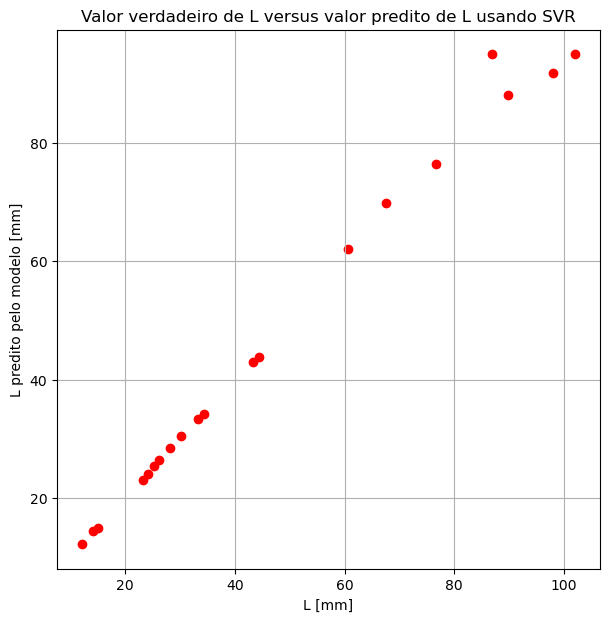

In [105]:
model_evaluation_grid(X_test_0, y_test_0, grid_0)

## Plots de L [mm] versus $f_{r}$ [GHz] para todos os valores de $\epsilon$

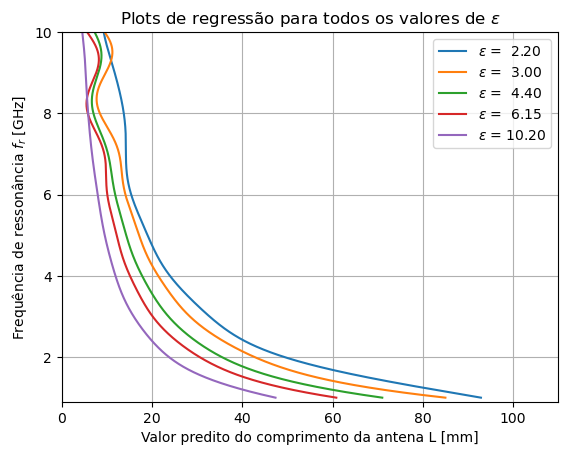

In [102]:
plt.figure()

#plt.plot(grid_0.predict(np.arange(min_freq_0, max_freq_0, 0.001).reshape(-1,1)), np.arange(min_freq_0, max_freq_0, 0.001))
#plt.plot(grid_1.predict(np.arange(min_freq_1, max_freq_1, 0.001).reshape(-1,1)), np.arange(min_freq_1, max_freq_1, 0.001))
#plt.plot(grid_2.predict(np.arange(min_freq_2, max_freq_2, 0.001).reshape(-1,1)), np.arange(min_freq_2, max_freq_2, 0.001))
#plt.plot(grid_3.predict(np.arange(min_freq_3, max_freq_3, 0.001).reshape(-1,1)), np.arange(min_freq_3, max_freq_3, 0.001))
#plt.plot(grid_4.predict(np.arange(min_freq_4, max_freq_4, 0.001).reshape(-1,1)), np.arange(min_freq_4, max_freq_4, 0.001))

plt.plot(grid_0.predict(np.arange(1, 10, 0.001).reshape(-1,1)), np.arange(1, 10, 0.001))
plt.plot(grid_1.predict(np.arange(1, 10, 0.001).reshape(-1,1)), np.arange(1, 10, 0.001))
plt.plot(grid_2.predict(np.arange(1, 10, 0.001).reshape(-1,1)), np.arange(1, 10, 0.001))
plt.plot(grid_3.predict(np.arange(1, 10, 0.001).reshape(-1,1)), np.arange(1, 10, 0.001))
plt.plot(grid_4.predict(np.arange(1, 10, 0.001).reshape(-1,1)), np.arange(1, 10, 0.001))



plt.title('Plots de regressão para todos os valores de $\epsilon$')
plt.xlabel('Valor predito do comprimento da antena L [mm]')
plt.ylabel('Frequência de ressonância $f_{r}$ [GHz]')
plt.xlim([0, 110])
plt.ylim([0.9, 10])
plt.legend(['$\epsilon$ =  2.20',
            '$\epsilon$ =  3.00',
            '$\epsilon$ =  4.40',
            '$\epsilon$ =  6.15',
            '$\epsilon$ = 10.20'])
plt.grid('on')



## Scatter para predição com o test_split

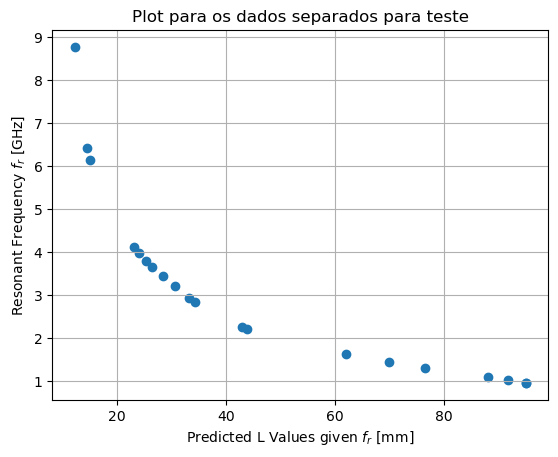

In [103]:
# Plotando apenas uma das curvas de regressão
fig = plt.figure()
ax = fig.add_subplot()

plt.title('Plot para os dados separados para teste')
plt.grid('on')
ax.scatter(grid_0.predict(X_test_0), X_test_0)
ax.set_xlabel('Predicted L Values given $f_{r}$ [mm]')
ax.set_ylabel('Resonant Frequency $f_{r}$ [GHz]')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

## Previsões de L usando um valor de frequência escolhido dentro do range treinado

In [104]:
# Testing the grid predictions using a user input value

lista_epsilon = [2.2, 3.0, 4.4, 6.15, 10.2]
while 1:
    freq_utilizada = float(input('Entre com a frequência entre 1 GHz e 10 GHz: '))
    epsilon = float(input('Entre com um valor dos seguintes valores para epsilon --> [2.2, 3, 4.4, 6.15, 10.2]: '))
    
    print('\n')
    print('<---->'*20)
    print('\n')
    
    if (((freq_utilizada < 1) or (freq_utilizada > 10)) or (epsilon not in lista_epsilon)):
        continue
    else:
        break

pred_2_2 = float(grid_0.predict(np.expand_dims(np.array(freq_utilizada), axis=0).reshape(-1,1)))
pred_3_0 = float(grid_1.predict(np.expand_dims(np.array(freq_utilizada), axis=0).reshape(-1,1)))
pred_4_4 = float(grid_2.predict(np.expand_dims(np.array(freq_utilizada), axis=0).reshape(-1,1)))
pred_6_15 = float(grid_3.predict(np.expand_dims(np.array(freq_utilizada), axis=0).reshape(-1,1)))
pred_10_2 = float(grid_4.predict(np.expand_dims(np.array(freq_utilizada), axis=0).reshape(-1,1)))


if epsilon == 2.2:
    print(
    f'Para uma frequência de {freq_utilizada} GHz e epsilon = {epsilon}, o valor estimado para a dimensão L é: {pred_2_2} mm')
elif epsilon == 3.0:
    print(
    f'Para uma frequência de {freq_utilizada} GHz e epsilon = {epsilon}, o valor estimado para a dimensão L é: {pred_3_0} mm')
elif epsilon == 4.4:
    print(
    f'Para uma frequência de {freq_utilizada} GHz e epsilon = {epsilon}, o valor estimado para a dimensão L é: {pred_4_4} mm')
elif epsilon == 6.15:
    print(
    f'Para uma frequência de {freq_utilizada} GHz e epsilon = {epsilon}, o valor estimado para a dimensão L é: {pred_6_15} mm')
else:
    print(
    f'Para uma frequência de {freq_utilizada} GHz e epsilon = {epsilon}, o valor estimado para a dimensão L é: {pred_10_2} mm')

Entre com a frequência entre 1 GHz e 10 GHz: 10
Entre com um valor dos seguintes valores para epsilon --> [2.2, 3, 4.4, 6.15, 10.2]: 2.2


<----><----><----><----><----><----><----><----><----><----><----><----><----><----><----><----><----><----><----><---->


Para uma frequência de 10.0 GHz e epsilon = 2.2, o valor estimado para a dimensão L é: 9.252072721725586 mm


## Obtendo um valor aleatório entre 1 GHz e 10 GHz para nova simulação

In [ ]:
# Generating a random float value between 1 and 10 (frequency interval)
import random
random.seed(3)
random_freq_0 = round(random.uniform(1, 10), 2)

random.seed(6)
random_freq_1 = round(random.uniform(1, 10), 2)

random.seed(1998)
random_freq_2 = round(random.uniform(1, 10), 2)

random.seed(2016)
random_freq_3 = round(random.uniform(1, 10), 2)

random.seed(2024)
random_freq_4 = round(random.uniform(1, 10), 2)

In [30]:
# Printing the random frequency values
random_freq_0, random_freq_1, random_freq_2, random_freq_3, random_freq_4

(3.14, 8.14, 6.32, 7.64, 5.23)

## Utilizando as frequências aleatórias para obter os valores de L a serem simulados para cada valor de $\epsilon$

In [77]:
random_L_0 = round(float(grid_0.predict(np.expand_dims(np.array(random_freq_0), axis=0).reshape(-1,1))), 3) # 2.2
random_L_1 = round(float(grid_1.predict(np.expand_dims(np.array(random_freq_1), axis=0).reshape(-1,1))), 3) # 3.0
random_L_2 = round(float(grid_2.predict(np.expand_dims(np.array(random_freq_2), axis=0).reshape(-1,1))), 3) # 4.4
random_L_3 = round(float(grid_3.predict(np.expand_dims(np.array(random_freq_3), axis=0).reshape(-1,1))), 3) # 6.15
random_L_4 = round(float(grid_4.predict(np.expand_dims(np.array(random_freq_4), axis=0).reshape(-1,1))), 3) # 10.2

In [78]:
print(f"Valor de L para nova simulação com freq = {random_freq_0} GHz e epsilon = 2.2: {random_L_0} mm")
print(f"Valor de L para nova simulação com freq = {random_freq_1} GHz e epsilon = 3.0: {random_L_1} mm")
print(f"Valor de L para nova simulação com freq = {random_freq_2} GHz e epsilon = 4.4: {random_L_2} mm")
print(f"Valor de L para nova simulação com freq = {random_freq_3} GHz e epsilon = 6.15: {random_L_3} mm")
print(f"Valor de L para nova simulação com freq = {random_freq_4} GHz e epsilon = 10.2: {random_L_4} mm")

Valor de L para nova simulação com freq = 3.14 GHz e epsilon = 2.2: 31.293 mm
Valor de L para nova simulação com freq = 8.14 GHz e epsilon = 3.0: 7.941 mm
Valor de L para nova simulação com freq = 6.32 GHz e epsilon = 4.4: 11.243 mm
Valor de L para nova simulação com freq = 7.64 GHz e epsilon = 6.15: 7.037 mm
Valor de L para nova simulação com freq = 5.23 GHz e epsilon = 10.2: 9.047 mm


---

# Algumas metricas

## $R^{2}$ Score

### O modelo linear explica 99,97% da variância da variável dependente a partir dos regressores (variáveis independentes) incluídas naquele modelo.

In [33]:
r2_score(y_test_0, grid_0.predict(X_test_0))

0.9902229349352747

## MAE (Mean Absolute Error)

In [34]:
mean_absolute_error(y_test_0, grid_0.predict(X_test_0))

1.4931123021400006

## MSE (Mean Squared Error)

In [35]:
mean_squared_error(y_test_0, grid_0.predict(X_test_0))

8.235114866054492

## MAPE (Mean Absolute Percentage Error)

In [36]:
mean_absolute_percentage_error(y_test_0, grid_0.predict(X_test_0))

0.021036452444489352

## MeAE (Median Absolute Error)

In [37]:
median_absolute_error(y_test_0, grid_0.predict(X_test_0))

0.2771081316976858

## AES (Absolute Error Score)

In [38]:
d2_absolute_error_score(y_test_0, grid_0.predict(X_test_0))

0.9366945961833576

## MSLE (Mean Squared Log Error)

In [39]:
mean_squared_log_error(y_test_0, grid_0.predict(X_test_0))

0.0010181808722536261

## Tweedie Score

In [40]:
d2_tweedie_score(y_test_0, grid_0.predict(X_test_0))

0.9902229349352747

## Pinball Score

In [41]:
d2_pinball_score(y_test_0, grid_0.predict(X_test_0))

0.9366945961833576

## MA (Max Error)

In [42]:
max_error(y_test_0, grid_0.predict(X_test_0))

8.14381188939818